# Robot Face Generator Tool # 
Written by: Jasper Bosschart
## Context ##

This is a tool that can generate robot faces using Image Generation Artificial intelligence (AI). <br>
The tool is built around the HuggingFace🤗 [Diffusers](https://huggingface.co/docs/diffusers/index) library. This library can be used to access a wide variety of diffusion AI models available on the HuggingFace🤗 [website](https://huggingface.co/). This tool uses an Image Generation Model called ["stable-diffusion-v1-5"](https://huggingface.co/runwayml/stable-diffusion-v1-5) by runwayml. <br>
The tool is still a work in progress and is subjected to change. It is currently built within Jupyter Notebook using Python, as this allows the file to be ran off a remote location easily. This is necessary as the tool requires large amounts of computational power, something a simple laptop is not able to output. Future development might enable for a standalone application.

## How To Generate? ##

### Step 1: ###

Jupyter Notebook is basically a looking python file, where you can add fully formatted text around and in between snippets of code. It might look quite confusing and a little scary at first, but don’t worry you will be guided through the whole process as long as you keep reading the accompanied text for each code snippet. As mentioned, before we will use a library called diffusers to be able to install our image generation AI. for this diffusers library and our AI to work well, we need some other Libraries too. to download all the necessary  libraries for the tool to work, run the code snippet below:

In [4]:
pip freeze | grep xformers

Note: you may need to restart the kernel to use updated packages.


In [6]:
!pip install xformers
!pip install torch==1.13.1+cu116 torchvision==0.14.1+cu116 torchaudio==0.13.1 --extra-index-url https://download.pytorch.org/whl/cu116
!pip install -U diffusers 
!pip install -U accelerate 
!pip install -U transformers

Defaulting to user installation because normal site-packages is not writeable
  Using cached xformers-0.0.20-cp38-cp38-manylinux2014_x86_64.whl (109.1 MB)
  Using cached pyre_extensions-0.0.29-py3-none-any.whl (12 kB)
  Using cached mypy_extensions-1.0.0-py3-none-any.whl (4.7 kB)
Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu116
  Using cached https://download.pytorch.org/whl/cu116/torch-1.13.1%2Bcu116-cp38-cp38-linux_x86_64.whl (1977.9 MB)
  Using cached https://download.pytorch.org/whl/cu116/torchvision-0.14.1%2Bcu116-cp38-cp38-linux_x86_64.whl (24.2 MB)
  Using cached https://download.pytorch.org/whl/cu116/torchaudio-0.13.1%2Bcu116-cp38-cp38-linux_x86_64.whl (4.2 MB)
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that a

### Step 2: ###
Now that we have downloaded the necessary libraries for the tool we need to import them into our current session, something which is not done automatically:

In [7]:
import torch
import accelerate 
import transformers
from diffusers import StableDiffusionPipeline

WARNING[XFORMERS]: xFormers can't load C++/CUDA extensions. xFormers was built for:
    PyTorch 2.0.1+cu118 with CUDA 1108 (you have 1.13.1+cu116)
    Python  3.8.16 (you have 3.8.10)
  Please reinstall xformers (see https://github.com/facebookresearch/xformers#installing-xformers)
  Memory-efficient attention, SwiGLU, sparse and more won't be available.
  Set XFORMERS_MORE_DETAILS=1 for more details
2023-05-31 22:21:54.358819: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-31 22:21:54.701988: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them o

### Step 3: ####
Now it is time to download the Image Generation Model, This can take some time so don't worry if it does not immediatelly finish. as you can see in the code snippet before, we specifically imported StableDiffusionPipeline from diffusers.

In [8]:
#orch.backends.cuda.matmul.allow_tf32 = False
pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16
)
#pipe.enable_sequential_cpu_offload()
#generator = torch.Generator("cuda").manual_seed(1024)

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


In [9]:
pipe = pipe.to("cuda")

In [10]:
from PIL import Image

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

In [11]:
prompt = "robot portrait, intricate, elegant, highly detailed, digital painting, artstation, concept art, smooth, sharp focus, 8k"
neg_prompt = "human features"


In [ ]:
prompt = "robot portrait, realistic"
neg_prompt = "painting"


In [16]:
prompt = "race car"
neg_prompt = "painting"


  0%|          | 0/50 [00:00<?, ?it/s]

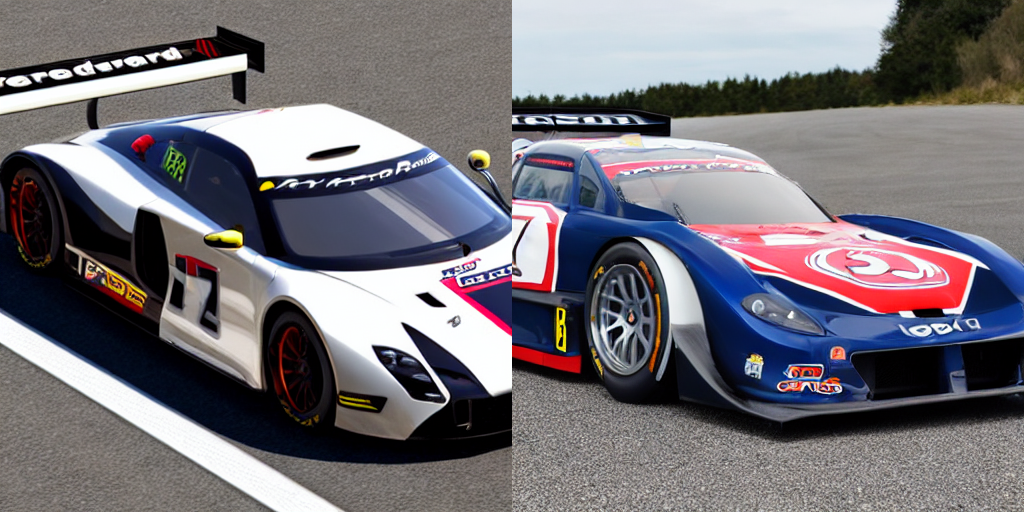

In [17]:
num_images = 2
Multi_prompt = [prompt] * num_images
Multi_prompt_N = [neg_prompt] * num_images

images = pipe(prompt=Multi_prompt, negative_prompt=Multi_prompt_N).images

grid = image_grid(images, rows=1, cols=2)
display(grid)

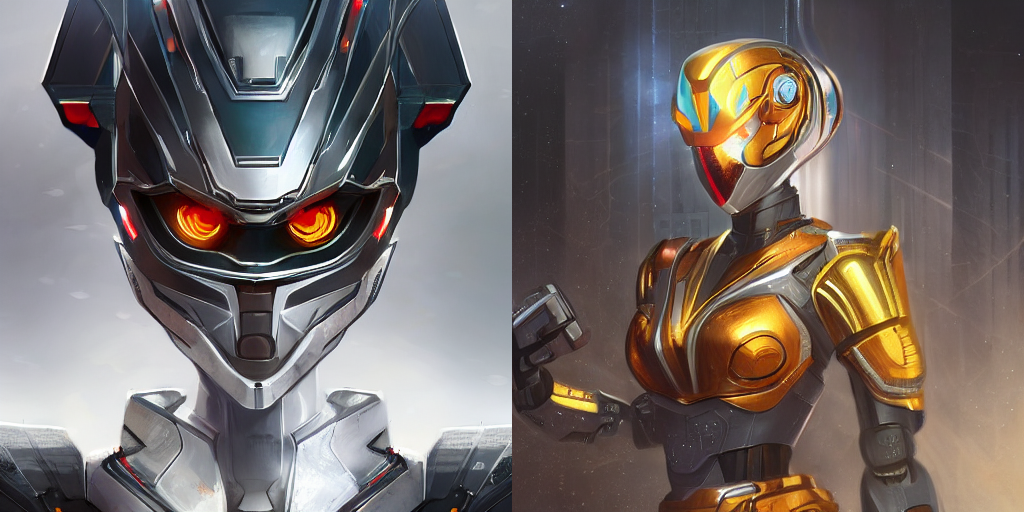

In [15]:
grid = image_grid(images, rows=1, cols=2)
display(grid)

In [ ]:
grid.save(f"robot1.png")

In [ ]:
images = pipe(prompt=prompt, negative_prompt=neg_prompt, num_images_per_prompt=2).images

grid = image_grid(images, rows=1, cols=4)
display(grid)

In [12]:
prompt = "portrait photograph of a robot"
image = pipe(prompt).images[0]
#image.show("image.png")
#display(image)

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:2                                                                                    │
│                                                                                                  │
│   1 prompt = "portrait photograph of a robot"                                                    │
│ ❱ 2 image = pipe(prompt).images[0]                                                               │
│   3 #image.show("image.png")                                                                     │
│   4 #display(image)                                                                              │
│   5                                                                                              │
│                                                                                                  │
│ /home/jovyan/.local/lib/python3.8/site-packages/torch/autograd/grad_mode.py:27 in                │
│ decorate_context                                                                                 │
│                                                                                                  │
│    24 │   │   @functools.wraps(func)                                                             │
│    25 │   │   def decorate_context(*args, **kwargs):                                             │
│    26 │   │   │   with self.clone():                                                             │
│ ❱  27 │   │   │   │   return func(*args, **kwargs)                                               │
│    28 │   │   return cast(F, decorate_context)                                                   │
│    29 │                                                                                          │
│    30 │   def _wrap_generator(self, func):                                                       │
│                                                                                                  │
│ /home/jovyan/.local/lib/python3.8/site-packages/diffusers/pipelines/stable_diffusion/pipeline_st │
│ able_diffusion.py:645 in __call__                                                                │
│                                                                                                  │
│   642 │   │   do_classifier_free_guidance = guidance_scale > 1.0                                 │
│   643 │   │                                                                                      │
│   644 │   │   # 3. Encode input prompt                                                           │
│ ❱ 645 │   │   prompt_embeds = self._encode_prompt(                                               │
│   646 │   │   │   prompt,                                                                        │
│   647 │   │   │   device,                                                                        │
│   648 │   │   │   num_images_per_prompt,                                                         │
│                                                                                                  │
│ /home/jovyan/.local/lib/python3.8/site-packages/diffusers/pipelines/stable_diffusion/pipeline_st │
│ able_diffusion.py:357 in _encode_prompt                                                          │
│                                                                                                  │
│   354 │   │   │   else:                                                                          │
│   355 │   │   │   │   attention_mask = None                                                      │
│   356 │   │   │                                                                                  │
│ ❱ 357 │   │   │   prompt_embeds = self.text_encoder(                                             │
│   358 │   │   │   │   text_input_ids.to(device),                                                 │
│   359 │   │   │   │   attention_mask=attention_mask,       

In [ ]:
display(grid)

In [ ]:
display(images[2])

In [ ]:
image.save(f"can1.png")

## Sources ##
For this project the following sources have been used:
-  https://huggingface.co/blog/stable_diffusion#how-does-stable-diffusion-work,
-  https://huggingface.co/runwayml/stable-diffusion-v1-5,
-  https://huggingface.co/docs/diffusers/using-diffusers/write_own_pipeline,
-  https://huggingface.co/docs/diffusers/v0.16.0/en/optimization/fp16

@InProceedings{Rombach_2022_CVPR, <br>
    author    = {Rombach, Robin and Blattmann, Andreas and Lorenz, Dominik and Esser, Patrick and Ommer, Bj\"orn}, <br>
    title     = {High-Resolution Image Synthesis With Latent Diffusion Models}, <br>
    booktitle = {Proceedings of the IEEE/CVF Conference on Computer Vision and Pattern Recognition (CVPR)}, <br>
    month     = {June}, <br>
    year      = {2022}, <br>
    pages     = {10684-10695} <br>
} <br>

In [ ]:
torch.cuda.empty_cache()

In [ ]:
!nvidia-smi

In [5]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Tue_Mar__8_18:18:20_PST_2022
Cuda compilation tools, release 11.6, V11.6.124
Build cuda_11.6.r11.6/compiler.31057947_0


In [ ]:
!nvcc --run /path/to/sample/cuda/cublas